In [1]:
import pandas as pd
import os

path = r'D:\elice_python\GAS_5\pytest_machine'
os.chdir(path)

In [3]:
data = pd.read_csv('cancer.csv', header=0)
print(data.head())
print(data.shape)
print(data.info())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0         18.0          10.4           123.0     1000.0           0.1180   
1         20.6          17.8           133.0     1330.0           0.0847   
2         19.7          21.3           130.0     1200.0           0.1100   
3         11.4          20.4            77.6      386.0           0.1420   
4         20.3          14.3           135.0     1300.0           0.1000   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.2780          0.3000               0.1470          0.242   
1            0.0786          0.0869               0.0702          0.181   
2            0.1600          0.1970               0.1280          0.207   
3            0.2840          0.2410               0.1050          0.260   
4            0.1330          0.1980               0.1040          0.181   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [4]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
print(X.shape, y.shape)

(569, 30) (569,)


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

지니 척도 기준 모델

In [7]:
model = DecisionTreeClassifier()  # criterion = 'gini' (default)
model.fit(X_train,y_train)

print(model.predict(X_train))
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

[0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0.
 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1.
 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0.
 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0.

정보 이익 분리 기준 모델

In [8]:
model2 = DecisionTreeClassifier(criterion='entropy')
model2.fit(X_train,y_train)

print(model2.predict(X_train))
print(model2.score(X_train,y_train))
print(model2.score(X_test,y_test))

[0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0.
 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1.
 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0.
 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0.

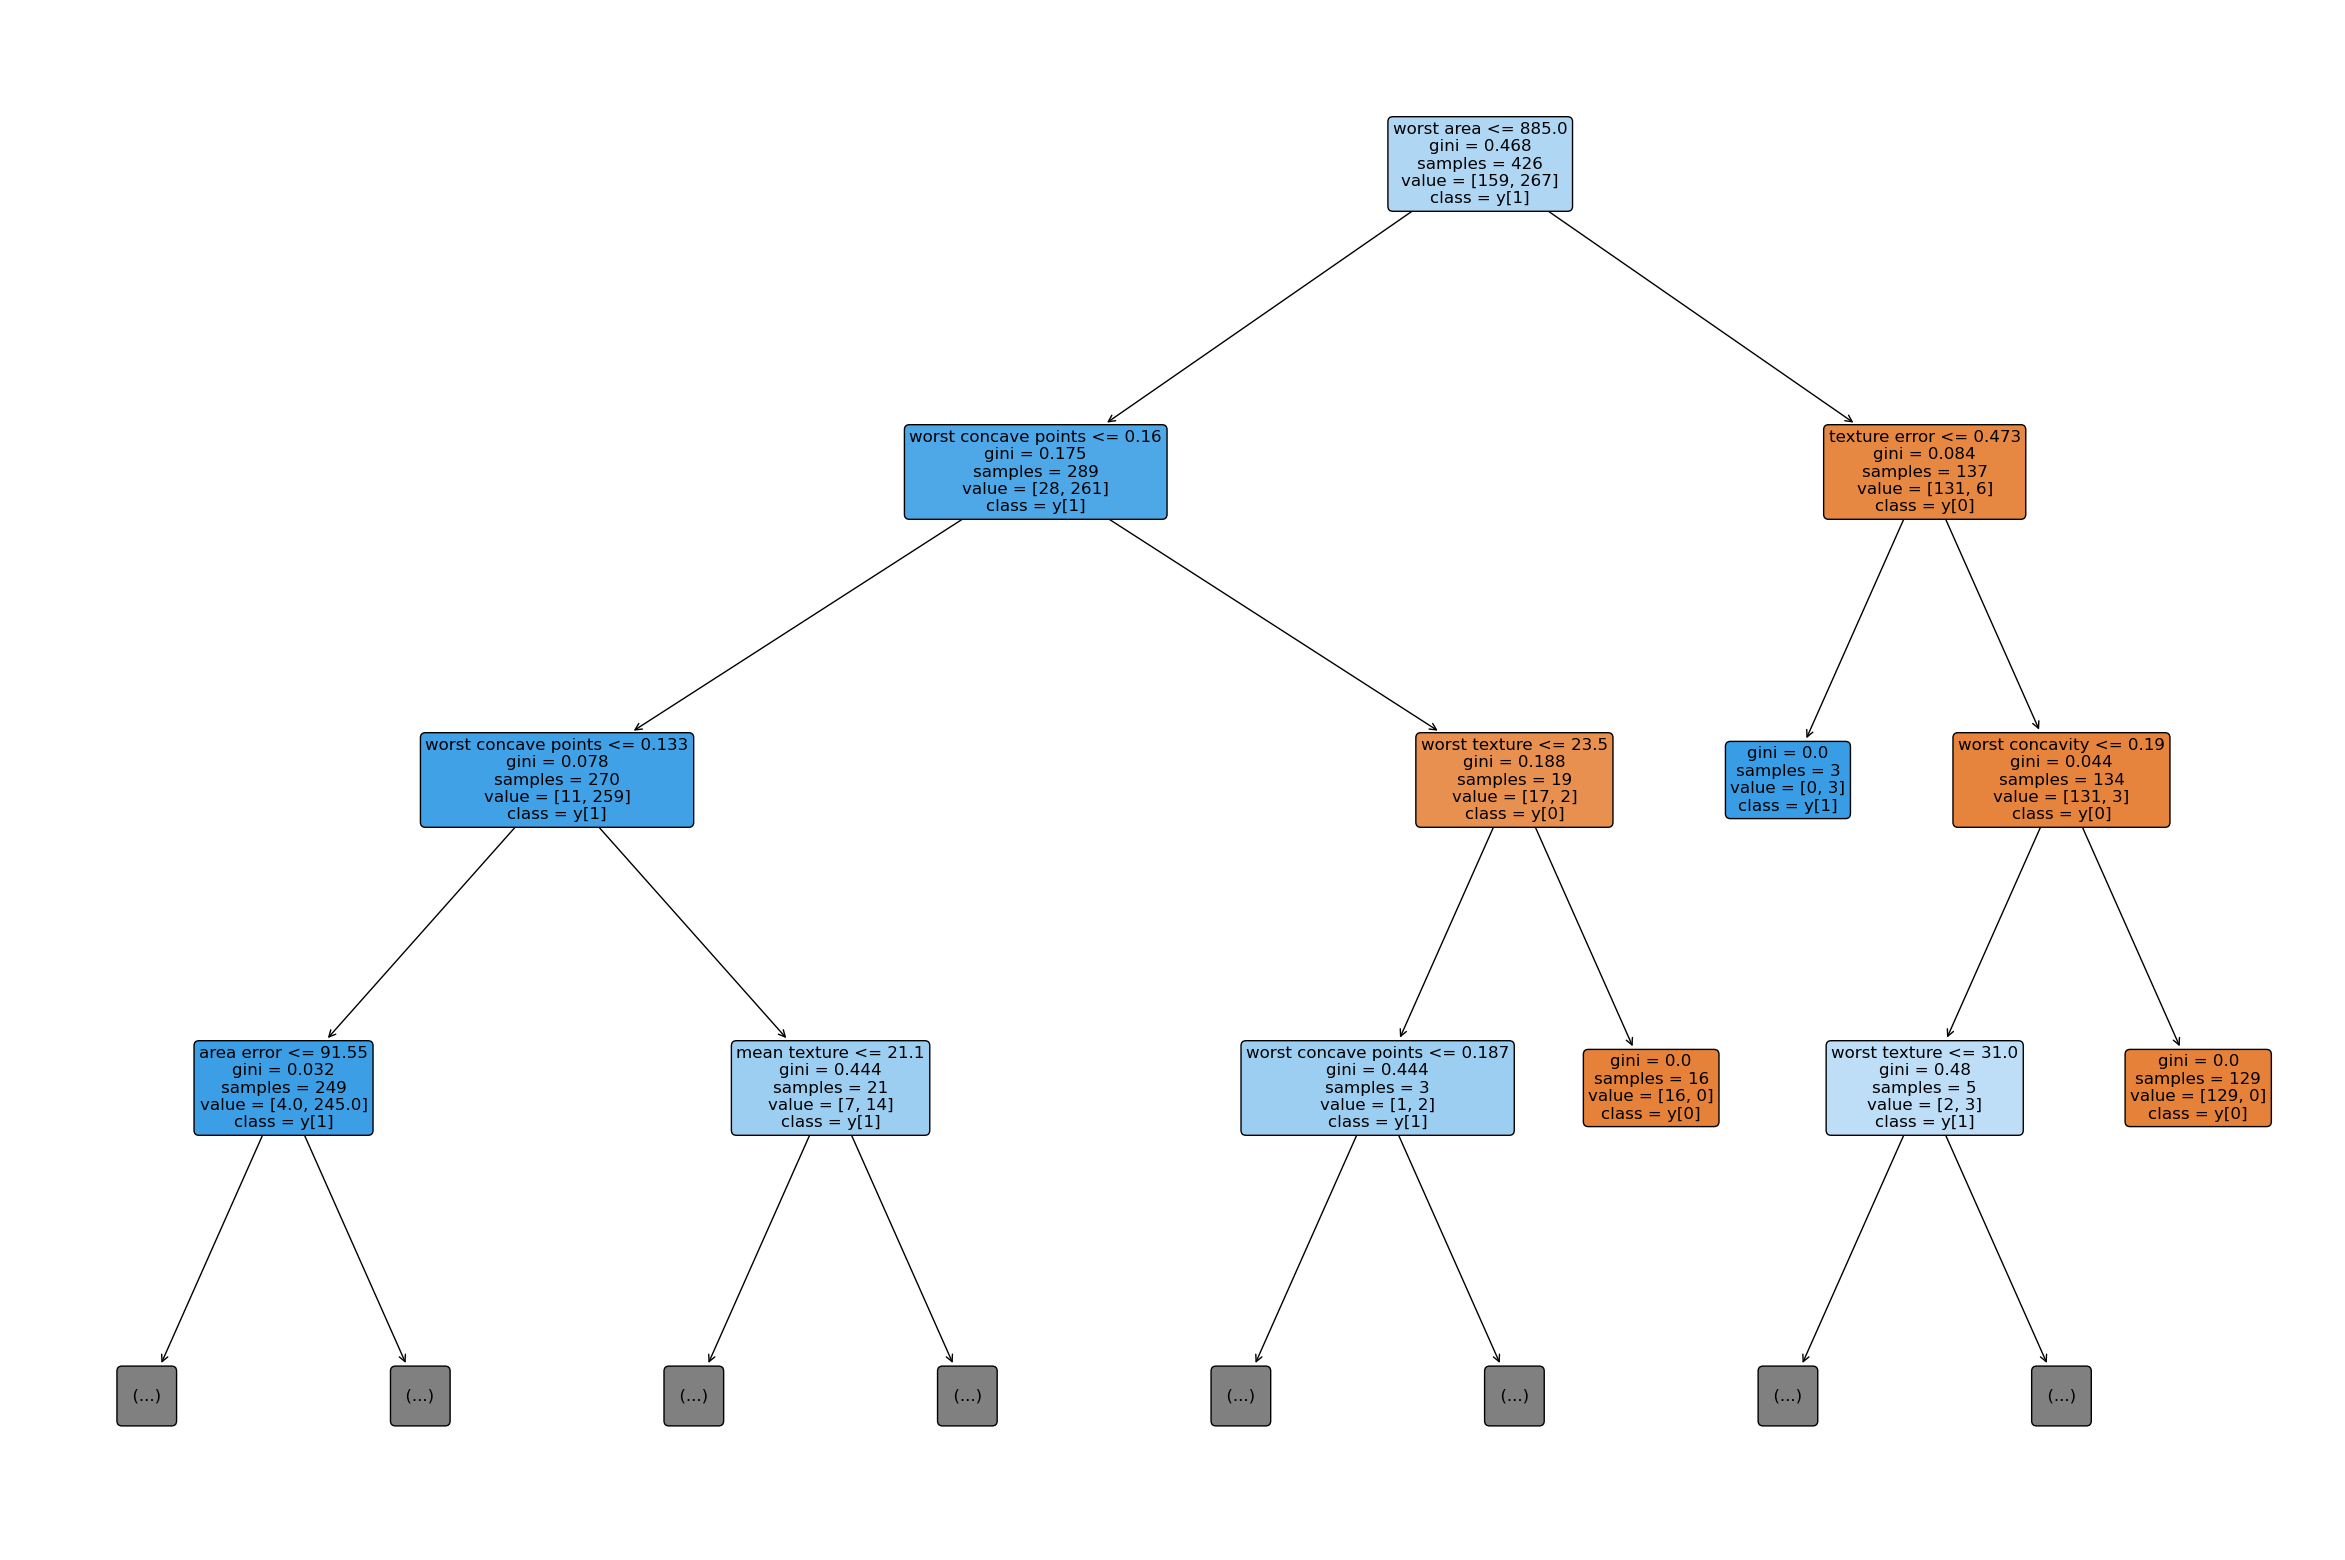

In [17]:
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model,
               feature_names=X_train.columns, 
                class_names=True,
                filled=True, 
                impurity=True, 
                rounded=True,
                max_depth=3)
plt.show()

GraphViz를 이용한 그래프

In [10]:
print(os.getcwd())

D:\elice_python\GAS_5\pytest_machine


In [11]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
export_graphviz(model, './pics/tree.dot', 
                feature_names=X_train.columns, 
                class_names=True,
                filled=True, 
                impurity=True, 
                rounded=True)

In [12]:
!dot -Tpng ./pics/tree.dot -o ./pics/tree.png

In [18]:
export_graphviz(model, './pics/tree2.dot', 
                feature_names=X_train.columns, 
                class_names=True,
                filled=True, 
                impurity=True, 
                rounded=True,
                max_depth=3)

In [19]:
!dot -Tpng ./pics/tree.dot -o ./pics/tree2.png

### 특성 중요도 관찰

In [20]:
import matplotlib.pyplot as plt
import numpy as np
print(f'number of features : {len(X_train.columns)}')

number of features : 30


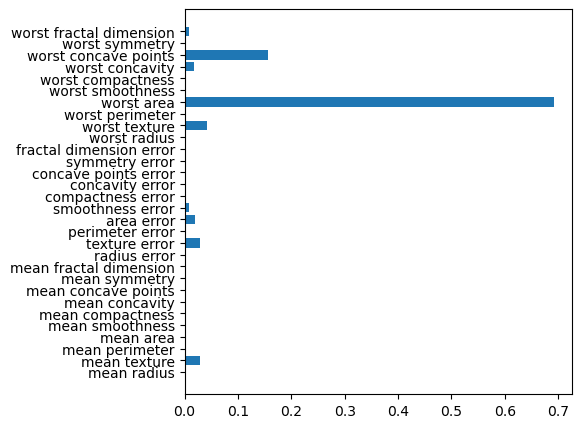

In [28]:
fig = plt.figure(figsize=(5,5))
plt.barh(np.arange(len(X_train.columns)), model.feature_importances_, align='center')
plt.yticks(np.arange(len(X_train.columns)), X_train.columns)
plt.show()